# Practicals in Seismology, winter semester 2024/25

_____

### Week 2, 30 Oct. 2024
### Topics: Gutenberg-Richter and Omori analysis
### Responsible: Dr. Yajian Gao

-------

**In this week's practicals you will learn**

* how to plot data from your catalogs according to Gutenberg-Richter and Omori laws
* how to fit lines and functions to data
* how to determine relevant parameters in Gutenberg-Richter and Omori laws

---


**Task 1: Computing a linear regression**

Very often it is helpful to describe your dataset by a function. In the easiest case, this function is a straight line. In the ideal case, the data is found exactly on the line, but usually the data is scattered around the line. The line can be desccribed by the function y = mx + c, where x and y are data pairs, m gives the slope of the line and c is the intercept.

Let’s create the data for this task now.

Before we do so we will need to include the library numpy (as np). You know this command from last week's Seismic exercise.

In [1]:
import numpy as np

As next step we generate a dataset of N x-values. A simple way of doing that is that we choose a number (the mean of our dataset) around which the other data points are distributed. In order to describe the distribution around the mean, we simply need to give a standard deviation. In the np random function, the first value corresponds to the center of the Gaussian distribution, the 2nd value to the width of the distribution and the third value to the size of output samples. Here we use a mean value of 5.0 and standard deviation of 1.0, and we will create N=200 data points.

In [2]:
x = np.random.normal(5.0,1.0,200) # (mean, std. deviation, N)

You can plot the data you created (x-values), using the histogram plot function from matplotlib. 

You used matplotlib during the Seismic exercise, and certainly you remember that it needs to be imported first. Import it as plt. 

Then use plt.hist to plot your data. Use 50 bins. The command is <code>plt.hist(data,n)</code>, where data is your data (x in this case) and n is the number of bins. After you plotted the data, you can add labels to x- and y-axes, and a grid if you want. You can also add a title to the graphics. Call it 'Linear Regression Exercise - Figure 1'. Don't forget to use the <code>plt.show()</code> command in the end.

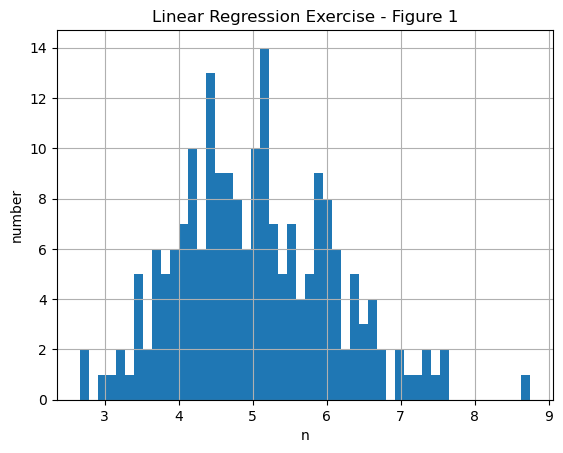

In [3]:
# import matplotlib here
import matplotlib.pyplot as plt
# plot histogram here
n=50
plt.hist(x,n)
# add x-label
plt.xlabel("n")
# add y-label
plt.ylabel("number")
# add grid
plt.grid()
# add title
plt.title("Linear Regression Exercise - Figure 1")
# show plot
plt.show()

In order to complete the dataset we need y-values corresponding to those x-values. Because they should be linear related to the x-values, we simply use the linear equation y = mx + c to compute those. Define an intercept of c = 60 and a gradient of m = 3 first.

In [4]:
# define m here
m=3
c=60
# define c here
y = m * (x) + c

Now you can plot your dataset which consists of x- and y-values. Use the command <code>plt.plot(x,y,'ko')</code>. Plot labels to your axes, add a grid (<code>plt.grid(True)</code>), a title ('Linear Regression Exercise - Figure 2'), and don't forget <code>plt.show()</code>.

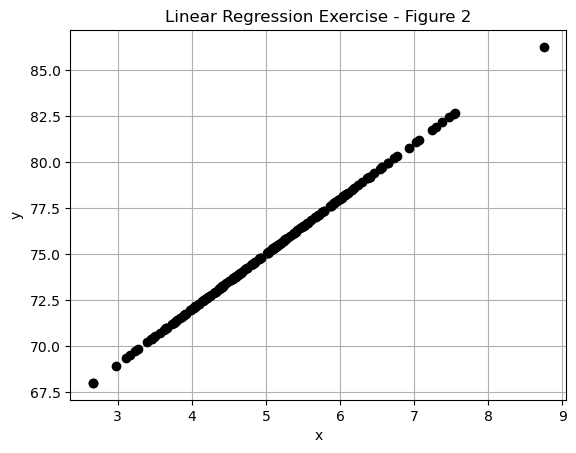

In [5]:
# plot data pairs here
plt.plot(x,y,'ko')
# add x-label
plt.xlabel("x")
# add y-label
plt.ylabel("y")
# add grid
plt.grid(True)
# add title
plt.title("Linear Regression Exercise - Figure 2")
# show plot
plt.show()

As you can see, because we computed the y-values from the x-values using an equation for a straight line, those fit very nicely. We could also add a little bit of scatter to the y-values, to get more realisitic data.

In [6]:
y = m * (x + np.random.normal(0,0.2,200)) + c # add a std. deviation to get a more realistic data

Plot the dataset again! You can use the same commands as above, but use 'Linear Regression Exercise - Figure 3' in the title instead.

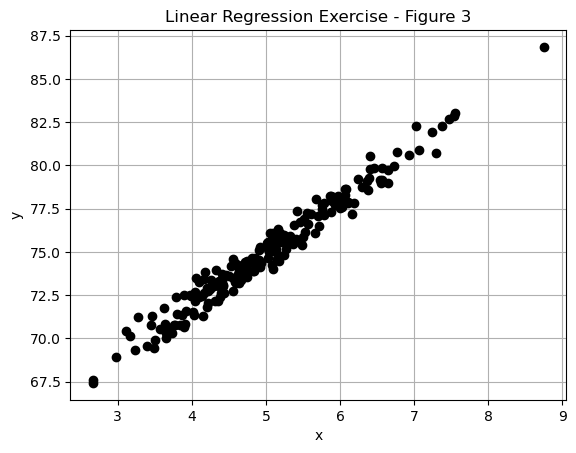

In [7]:
# plot new data pairs here
plt.plot(x,y,'ko')
# add x-label
plt.xlabel("x")
# add y-label
plt.ylabel("y")
# add grid
plt.grid(True)
# add title
plt.title("Linear Regression Exercise - Figure 3")
# show plot
plt.show()

As next step we will compute a linear regression to this data. Here, we will use a new library, which is called scipy. We will use the function stats from the scipy-library to compute the linear regression. It is applied to the dataset (x,y) and returns the slope and intercept of the straight line, and some additional values, which describe the quality of the fit. You don't have to make any changes to the cell below, but make sure that you understand it.

In [8]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('Slope: ',slope)
print('Intercept: ',intercept)

Slope:  3.020331643071775
Intercept:  59.85574957796439


In order to plot the line, we need to compute the y-values of the regression using slope and intercept, as well as our x-values. For this, we use the function predict_y_for(data).

In [9]:
def predict_y_for(x):
    return slope * x + intercept

Now let's plot dataset and regression together! Simply use the command <code>plt.plot</code> twice. The second plt.plot command is already inserted in the cell. Use 'Linear Regression Exercise - Figure 4' as title. 

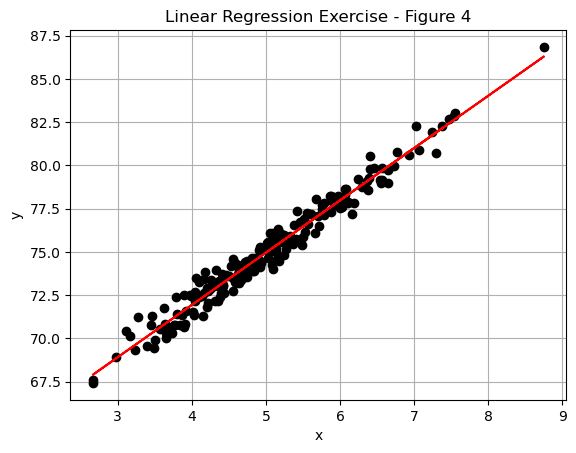

In [10]:
# plot data pairs here
plt.plot(x,y,'ko')
plt.plot(x, predict_y_for(x), c='r')
# add x-label
plt.xlabel("x")
# add y-label
plt.ylabel("y")
# add grid
plt.grid(True)
# add title
plt.title("Linear Regression Exercise - Figure 4")
# show plot
plt.show()

At this point, you have all you need to do the Gutenberg-Richter analysis.

**Task 2: Gutenberg – Richter analysis**

We will plot the Gutenberg-Richter distribution of all European earthquakes larger than M4 in the next steps. Start with reading in your catalog, which is in the Files-folder and named Europe_mge4_1900_1999.txt. The data from the catalog will be copied into two arrays M (for magnitudes) and N (for number of occurence). You don't need to make any changes to the next cell.

In [11]:
filepath = 'Files/Europe_mge4_1900_1999.txt'
M = []
N = []
with open(filepath, 'r') as f:
    MInfo = f.readlines()
for Magn in [line.rstrip('\n') for line in MInfo]:
    info = Magn.split()
    M.append(float(info[0]))
    N.append(float(info[1]))
N=np.asarray(N)  # change list to array
M=np.asarray(M)  # -"-

Now plot the Gutenberg Richter distribution by executing the next cell withouth any changes.

Once you have done that try to change the colour of the dots which represent the data changing the first letter in 'ko' in line 1. Accordingly try to change the shape of the symbol by changing the second letter. What happens if you use 'r--' or 'bs' or 'g^' instead of 'bd?

Try out what happens if you change the axis limits of the x axis (change numbers in line 2 of the script). Add limits to the y axis and change those accordingly. 

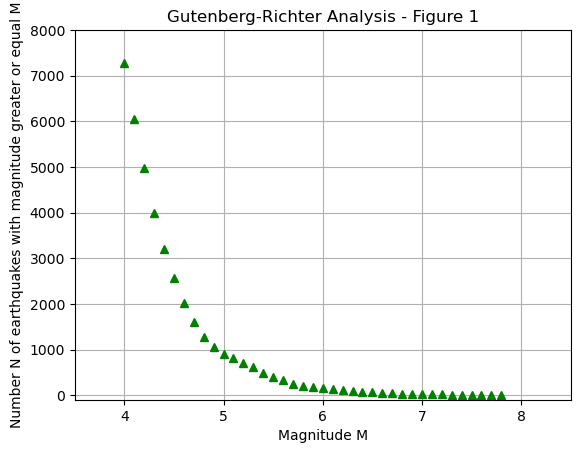

In [12]:
plt.plot(M, N, 'g^')
plt.xlim((3.5,8.5))
plt.ylim((-100,8000))
plt.title('Gutenberg-Richter Analysis - Figure 1')
plt.xlabel('Magnitude M')
plt.ylabel('Number N of earthquakes with magnitude greater or equal M')
plt.grid(True)
plt.show()

In order to describe the dataset better, it is useful to fit a function. In task 1, we fitted a line to the dataset. However, in the above figure we can see that the dataset isn't resembled by a straight line. In fact, the Gutenberg-Richter distribution follows the equation

log10(N)= a - bM

A simple trick: We use a logarithmic N-axis to see the linear trend. 

Plot the data again, but include the command <code>plt.yscale('log')</code> before showing the plot.

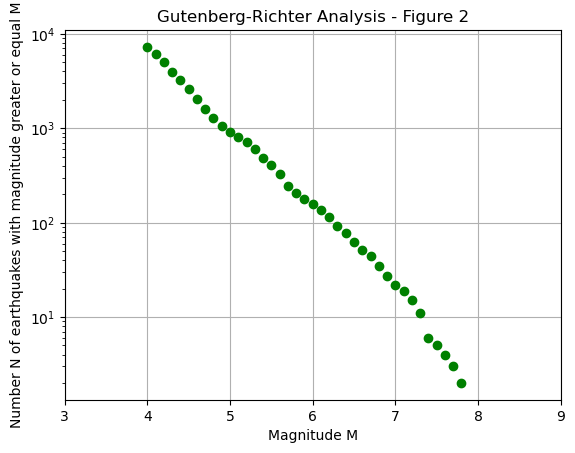

In [13]:
# plot data pairs here (M,N)
plt.plot(M, N, 'go')
# add limits to x-axis (3,9)
plt.xlim((3,9))
# add title (use 'Gutenberg-Richter Analysis - Figure 2')
plt.title('Gutenberg-Richter Analysis - Figure 2')
# add x-label
plt.xlabel('Magnitude M')
# add y-label
plt.ylabel('Number N of earthquakes with magnitude greater or equal M')
# include here the command which gives you a log y-axis
plt.yscale('log')
# add grid
plt.grid(True)
# show plot
plt.show()

Another way to display the linear relation would be to compute the logarithm of N first. You can do that executing the following cell. Here, a function from the numpy-library is used.

In [14]:
NN=np.log10(N)

Now plot your data again!

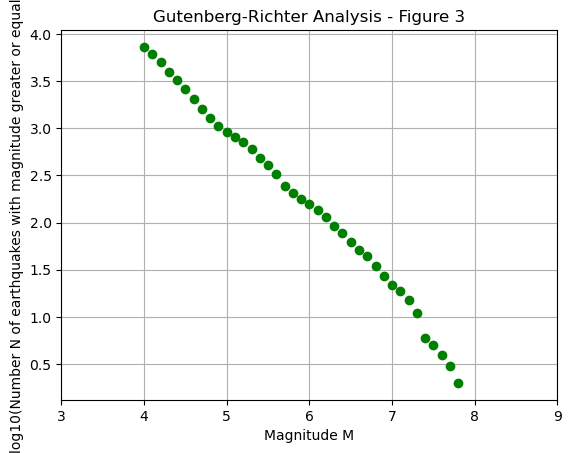

In [16]:
%matplotlib inline

# plot data pairs here (M,NN)
plt.plot(M, NN, 'go')
# add limits to x-axis (3,9)
plt.xlim((3,9))
# add title (use 'Gutenberg-Richter Analysis - Figure 3')
plt.title('Gutenberg-Richter Analysis - Figure 3')
# add x-label
plt.xlabel('Magnitude M')
# add y-label
plt.ylabel('log10(Number N of earthquakes with magnitude greater or equal M)')
# you mustn't include the command which gives you a log y-axis, because your values are already the log10(N)
# add grid
plt.grid(True)
# show plot
plt.show()

**Questions to think about after you plotted the data:**

* What can you say about the magnitude of completeness (lower limit) for your catalog?
* And how about large magnitudes? Determine a cut-off magnitude (upper limit) for your catalog. Hint: add the **%matplotlib notebook** comment at the top of a plot to obtain an interactive plot. To go back to inline plots, use **%matplotlib inline**
* When you were asked to fit a straight line in order to determine the b-value of the distribution, in which range would you fit it? The lower range should be the magnitude of completeness of your catalog, the upper limit should correspond to your estimated cut-off magnitude. Write down the two values.

In the next step we will compute this straight line using a regression. Do that as you did above in task 1, using M and NN for x and y. You don't need to make any changes to the next cell.

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(M,NN)

print('Slope: ',slope)
print('Intercept: ',intercept)

Slope:  -0.8741204612001726
Intercept:  7.384009013817331


Can you explain why the slope is negative now? **$\rightarrow$ y values decrease with M**

Now we will compute the values on the y-axis (NN) using predict_y_for(data), as we did in task 1.

In [18]:
def predict_y_for(M):
    return slope * M + intercept

And finally data and straight line can be plotted together. Youdon't need to make any changes to the next cell.

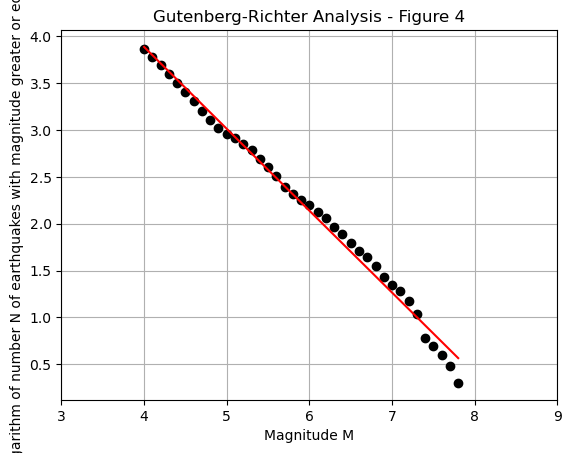

In [19]:
%matplotlib inline 

plt.plot(M, NN, 'ko')
plt.plot(M, predict_y_for(M), c='r')
plt.xlim((3,9))
plt.xlabel('Magnitude M')
plt.ylabel('Logarithm of number N of earthquakes with magnitude greater or equal M')
plt.title('Gutenberg-Richter Analysis - Figure 4')
plt.grid(True)
plt.show()

If you still have time, do the exercise (task 2) again, but using a catalog that contains all earthquakes larger or equal M = 2.5. It will be provided during the exercise (file name Files/Europe_mge2.5_1900_1999.txt). You can insert the catalogue's name in the first cell after the start of task 2. Execute all cells again. You will need to change the x-axis limits. What would be a good value to use as lower limit?

**Results are below**

In [20]:
filepath = 'Files/Europe_mge2.5_1900_1999.txt'
M = []
N = []
with open(filepath, 'r') as f:
    MInfo = f.readlines()
for Magn in [line.rstrip('\n') for line in MInfo]:
    info = Magn.split()
    M.append(float(info[0]))
    N.append(float(info[1]))
N=np.asarray(N)  # change list to array
M=np.asarray(M)  # -"-

NN=np.log10(N)

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(M,NN)

print('Slope: ',slope)
print('Intercept: ',intercept)

Slope:  -0.8125855627970253
Intercept:  6.999550048514585


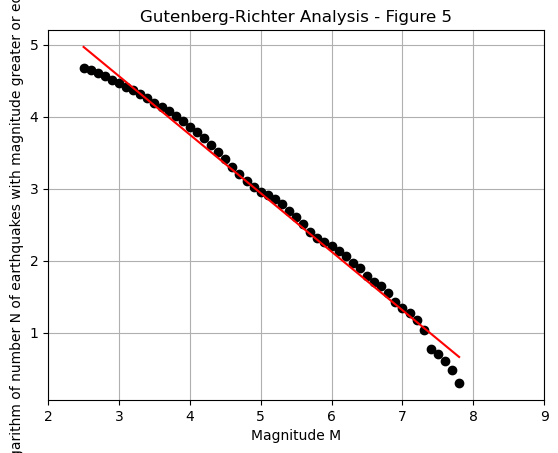

In [22]:
plt.plot(M, NN, 'ko')
plt.plot(M, predict_y_for(M), c='r')
plt.xlim((2,9))
plt.xlabel('Magnitude M')
plt.ylabel('Logarithm of number N of earthquakes with magnitude greater or equal M')
plt.title('Gutenberg-Richter Analysis - Figure 5')
plt.grid(True)
plt.show()

**Please note: the slope is smaller compared to the first example. This is an artifact because the catalog is not complete down to magnitude 2.5. We have to fit the regression to a subset of the data.**

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(M[15:],NN[15:])

print('Slope: ',slope)
print('Intercept: ',intercept)

Slope:  -0.8741204612001726
Intercept:  7.384009013817331


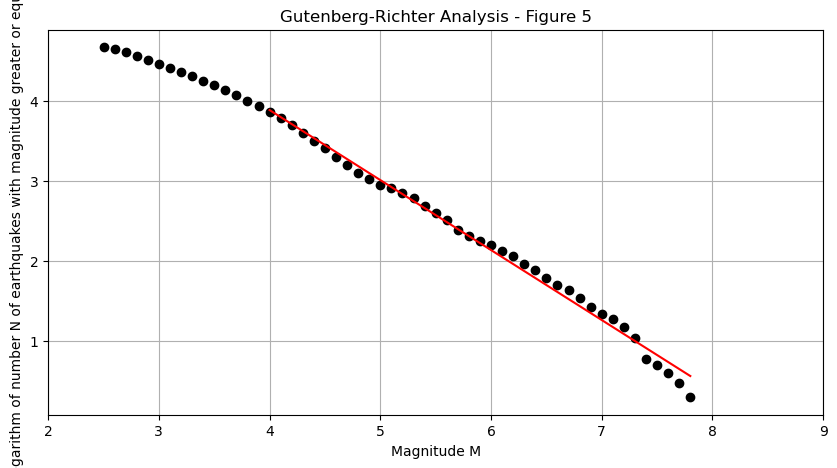

In [32]:
plt.plot(M, NN, 'ko')
plt.plot(M[15:], predict_y_for(M[15:]), c='r')
plt.xlim((2,9))
plt.xlabel('Magnitude M')
plt.ylabel('Logarithm of number N of earthquakes with magnitude greater or equal M')
plt.title('Gutenberg-Richter Analysis - Figure 5')
plt.grid(True)
plt.show()

**You can use these plots to understand the sensitivity of the b value relative to the cut-off value.**

**Task 3: Omori analysis**

The Omori law describes the number of aftershocks per time n(t): n (t) = k / (c + t). k and c are constants and vary between earthquake sequences. Aftershocks are recorded until the background level of seismicity is reached again after a large earthquake.  
Before you start, think about the following questions:
* How can you find out when the background level is reached again after an earthquake?
* What are the spatial and temporal limits in which you would expect aftershocks?
   
We will start again with importing some packages that we haven't used so far. Please execute the next cell.

In [33]:
import matplotlib.dates as mdates
import datetime as dt

Very similar to above, you will read in the catalog data now. Compare the following cell to the equivalent cell in task 2, and execute it.

In [34]:
filepath = 'Files/Tohoku_2011.txt' 
D = []
X = []
with open(filepath, 'r') as f:
    DInfo = f.readlines()
for day in [line.rstrip('\n') for line in DInfo]:
    info = day.split()
    D.append(str(info[0]))
    X.append(int(info[1]))
X=np.asarray(X)

For an Omori analysis, we use dates and times instead of simple numbers. Therefore, you will need to construct a date axis which will later be used for inversion and plotting.

In [36]:
date = []
for day in D:
    date.append(dt.datetime.strptime(day, "%Y-%m-%d"))

eventdate = dt.datetime.strptime("2011-03-12", "%Y-%m-%d")
enddate = dt.datetime.strptime("2011-12-30", "%Y-%m-%d")
startii = [i for i in range (len(D)) if date[i]==eventdate][0]
endii = [i for i in range (len(D)) if date[i]==enddate][0]
date_omori = date[startii:endii]
datenum = mdates.date2num(date_omori)-mdates.date2num(eventdate)

You might want to plot your data first. Execute the following cell (Note: The 2nd line increases the plot size to prevent the x-labels to overlap)

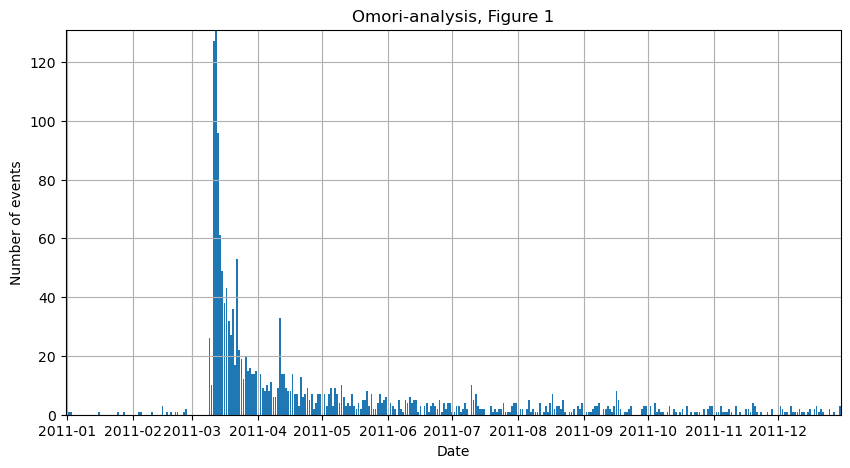

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

plt.bar(date,X)
plt.title('Omori-analysis, Figure 1')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid(True)
plt.show()

The next step will be to fit a function to this data which describes the decay of number of events over time properly. This time, we will not simply be able to compute a linear regression, but we will need a more sophisticated function. Here we will define this function, similar as in task 2 above. The function will later be used for the curve-fitting. Let's call this function func.

In [37]:
def func(t, k, c):
    return k/(c+t)

In the next cell, a curve-fitting fis performed to find the optimal parameters which you can then read from popt. Before we can use this function, we need to import it.

In [38]:
from scipy.optimize import curve_fit

In [39]:
popt, pcov = curve_fit(func, datenum, X[startii:endii])

The next cell will plot the data together with the fitted curve.

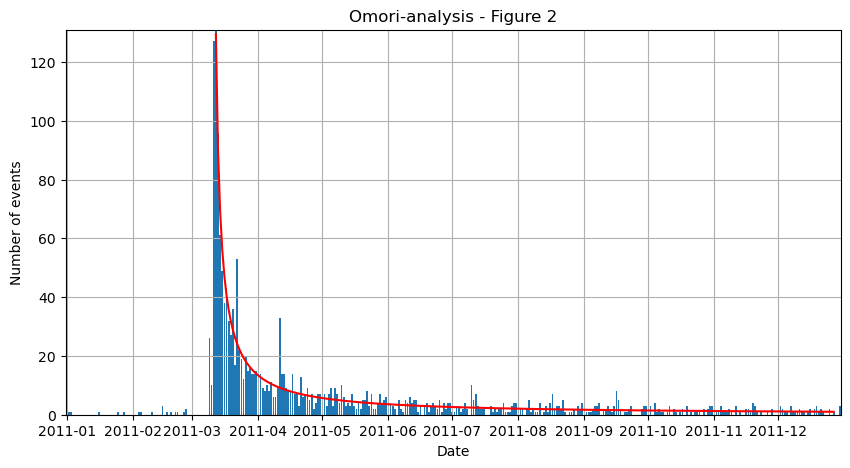

In [40]:
plt.bar(date,X)
plt.plot(date_omori,func(datenum, *popt),'-r',linewidth=1.5)
plt.title('Omori-analysis - Figure 2')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid(True)
plt.show()

Now use aftershock data until 29 February 2012 which is provided in the catalog Tohoku.txt. Start again from the top of task 3, but change the filname in cell 2 accordingly. Make sure that you also change enddate in the third cell of task 3  – set it to the last date in the list. Would you say that seismicity reached the background level at the end of February 2012? Discuss the effect of larger aftershocks!

**See results below:**

In [35]:
filepath = 'Files/Tohoku.txt' 
D = []
X = []
with open(filepath, 'r') as f:
    DInfo = f.readlines()
for day in [line.rstrip('\n') for line in DInfo]:
    info = day.split()
    D.append(str(info[0]))
    X.append(int(info[1]))
X=np.asarray(X)

In [36]:
date = []
for day in D:
    date.append(dt.datetime.strptime(day, "%Y-%m-%d"))

eventdate = dt.datetime.strptime("2011-03-12", "%Y-%m-%d")
enddate = dt.datetime.strptime("2012-02-29", "%Y-%m-%d")
startii = [i for i in range (len(D)) if date[i]==eventdate][0]
endii = [i for i in range (len(D)) if date[i]==enddate][0]
date_omori = date[startii:endii]
datenum = mdates.date2num(date_omori)-mdates.date2num(eventdate)

In [37]:
popt, pcov = curve_fit(func, datenum, X[startii:endii])

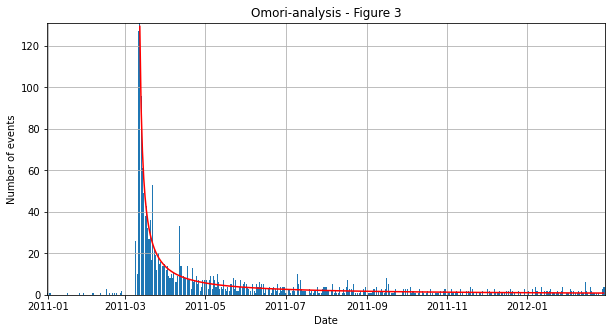

In [38]:
plt.bar(date,X)
plt.plot(date_omori,func(datenum, *popt),'-r',linewidth=1.5)
plt.title('Omori-analysis - Figure 3')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid(True)
plt.show()

Would you say that seismicity reached the background level at the end of February 2012? **$\rightarrow$ no, far more earthquakes than prior to main shock**

Discuss the effect of larger aftershocks! **$\rightarrow$ large aftershocks tricker their own aftershock sequence, which again follows the Omori law**